# Cutting band structure or band mapping data to the first Brillouin zone

In [4]:
import numpy as np
import fuller
import scipy.io as sio
import matplotlib.pyplot as plt
import os

In [5]:
data_path = '../' # Put in Path to a storage of at least 20 Gbyte free space.
if not os.path.exists(data_path + "/data.zip"):
    os.system(f"curl -L --output {data_path}/data.zip https://zenodo.org/records/7314278/files/data.zip")
if not os.path.isdir(data_path + "/data"):
    os.system(f"unzip -d {data_path} -o {data_path}/data")

### 1. Load data

In [6]:
bs_hse = sio.loadmat('../data/theory/WSe2_HSE06_bands.mat')
bshse = np.moveaxis(bs_hse['evb'][::2,...], 1, 2)

In [7]:
bs_hse['kxxsc'].shape

(319, 339)

### 2. Determine Brillouin zone boundary using landmarks

In [8]:
bzn = fuller.generator.BrillouinZoner(bands=bshse, axis=0)

In [9]:
bzn.select_slice(selector=slice(0, 1))

In [10]:
bzn.findlandmarks(image=bzn.slice, method='daofind', sigma=25, fwhm=40, sigma_radius=4, image_ofs=[25,25,0,0])

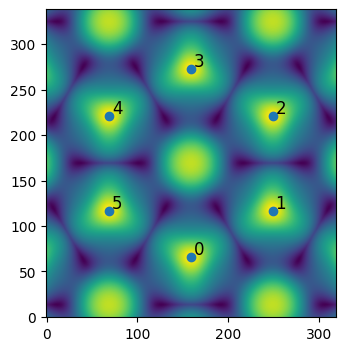

In [11]:
bzn.visualize(bzn.slice, annotated=True, points=dict(pts=bzn.pouter_ord))
# plt.scatter(bzn.pcent[1], bzn.pcent[0], s=100, c='r')

### 3. Calculate geometric parameters for creating data mask

In [12]:
imr, imc = bzn.slice.shape
hexside = np.linalg.norm(bzn.pouter_ord[1,:] - bzn.pouter_ord[2,:])
hexdiag = np.linalg.norm(bzn.pouter_ord[1,:] - bzn.pouter_ord[4,:])
imside = min(bzn.slice.shape)
ptop = (imr - hexdiag) / 2
# Calculate the distance of twice of the apothem (apo diameter)
apod = np.abs(np.sqrt(3)*hexside)
pleft = (imc - hexdiag) / 2

In [13]:
bzn.maskgen(hexdiag=int(hexdiag), imside=imside, image=None, padded=True,
                               pad_top=int(ptop), pad_left=int(pleft), ret='all')

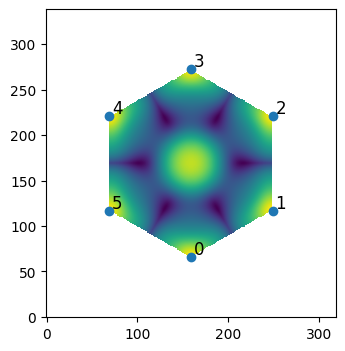

In [14]:
bzn.visualize(bzn.mask*bzn.slice, annotated=True, points=dict(pts=bzn.pouter_ord))

In [15]:
bzn.bandcutter(selector=slice(0, None))

Energy band data sliced to the first Brillouin zone now bears the name `bandcuts`

In [16]:
bzn.bandcuts.shape

(40, 208, 208)

### 4. Save sliced data

In [17]:
bzn.summary();

In [18]:
bzn.save_data(form='h5', save_addr=r'./wse2_hse_bandcuts.h5')

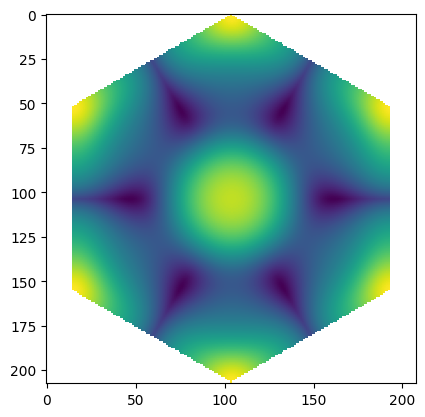

In [20]:
plt.imshow(bzn.bandcuts[0,...])

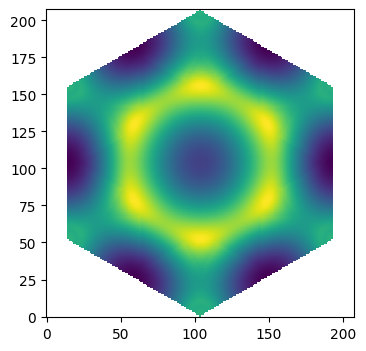

In [21]:
bzn.visualize(bzn.bandcuts[12,...])

### Load data using external function
Demonstration here using ``fuller.utils.load_multiple_bands()``

In [22]:
fdir = '../data/theory/bands_1BZ/'

In [23]:
bzn = fuller.generator.BrillouinZoner(folder=fdir)
bzn.load_data('', loadfunc=fuller.utils.load_multiple_bands, ret=False, ename='bands/Eb', kname='axes')

UnboundLocalError: local variable 'f_inst' referenced before assignment

In [ ]:
bzn.select_slice(selector=slice(0, 1))

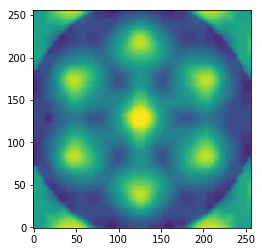

In [ ]:
bzn.visualize(bzn.slice, annotated=False)